# Importando bibliotecas

# TECH Challenge
# Enunciado
Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo.
Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:
1. País de origem (Brasil).
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01
Seu objetivo é dizer o **montante de venda de exportação nos últimos 15 anos**, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações. 


Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import seaborn as sb
from datetime import date
import matplotlib.ticker as ticker
import matplotlib
import my_functions as my

In [2]:
colors_dict = {
    'dark wine':'#38001a',
    'medium wine':'#A10028',
    'bright wine':'#D73D00',
    'olive yellow':'#cf9800',
    'olive green':'#918700',
    'brown':'#974d1c',
    'neon green':'#84dc00',
    'neon cyan':'#00cbb7',
    'neon blue':'#a00500',
    'dark red':'#ff3f3f',
    'neon red':'#817700',
}

colors_main = [list(colors_dict.values())[i] for i in range(0,6)]
colors_accent = [list(colors_dict.values())[i] for i in range(6,len(colors_dict))]
colors_rotation = ['#520026',
                   # '#A10028',
                   '#C64B1B',
                   # '#E37F0E',
                   '#FFB300',
                   '#BA8600',
                   # '#887f00',
                   '#3D4800',
                   '#79a500',
                   '#AFDF00']


cycler_main = cycler(color=colors_main)
cycler_accent = cycler(color=colors_accent)
cycler_rotation = cycler(color=colors_rotation)

my.set_axes_cycler(cycler_main)
# plt.rc('axes', prop_cycle=cycler_main)

In [3]:
line_width = 3
size = (10,6)
size_stretch = (2,3)
size_stretch_mild = (3,3)
size_stretch_big = (3,6)
size_squash = (10,3)
size_squash_mild = (10,4)

# Processing

In [4]:
df_exports = pd.read_csv('./extraidos_final/ALL_exports.csv', index_col=0)
df_population = pd.read_csv('./extraidos_final/countries_population.csv', index_col=0)

In [5]:
export_type = df_exports['tipo'].unique()
type_color_name = {
    'Vinhos de mesa': 'dark wine',
    'Vinhos espumantes':'medium wine',
    'Suco de uva':'olive yellow',
    'Uvas frescas':'olive green'
}

type_color = {key: colors_dict[value] for key,value in zip(type_color_name.keys(), type_color_name.values())}

In [6]:
df_exports['kg'] = df_exports['kg'].replace(0,np.nan)

In [7]:
df_exports['valor_por_kg'] = df_exports['valor'] / df_exports ['kg']

In [8]:
df_exports['ano'] = df_exports['ano'].map(lambda x : date(int(x),1, 1))

In [9]:
sorted(df_exports['pais_destino'].unique());

In [10]:
replace_dictionary = {
    'Alemanha, República Democrática':'Alemanha',
    'Alemanha, República Democrática da':'Alemanha', 
    'Australia':'Austrália',
    'Belice': 'Belize',
    'Bulgaria': 'Bulgária',
    'Bósnia': 'Bósnia-Herzegovina',
    'Canada': 'Canadá',
    'Colombia':'Colômbia',
    'Coreia do Sul, Republica da':'Coreia do Sul',
    'Coreia, Republica Sul' : 'Coreia do Sul',
    'Coveite (Kuweit)' : 'Kuweit',
    'Dominica, Ilha de':'Dominica',
    'Emirados Arabes Unidos':'Emirados Árabes Unidos',
    'Estonia':'Estônia',
    'Falkland (Ilhas Malvinas)':'Falkland (Malvinas)',
    'Filânldia':'Finlândia', 
    'Guine Equatorial':'Guiné Equatorial',
    'Guine Bissau':'Guiné Bissau',
    'Guiné-Bissau':'Guiné Bissau',
    'India':'Índia',
    'Países Baixos (Holanda)':'Países Baixos',
    'Republica Dominicana':'República Dominicana',
    'República Federativa da Rússia':'Rússia',
    'Tcheca, República':'República Tcheca',
    'Rússia,  Federação da':'Rússia',
    'Taiwan (Formosa)':'Taiwan',
    'Trinidade Tobago':'Trindade e Tobago',
    'Trinidade e Tobago':'Trindade e Tobago',
}

In [11]:
continents = {
  "Afeganistão": "Ásia",
  "Africa do Sul": "África",
  "Alemanha": "Europa",
  "Angola": "África",
  "Anguilla": "América do Norte",
  "Antigua e Barbuda": "América do Norte",
  "Antilhas Holandesas": "América do Norte",
  "Antígua e Barbuda": "América Central",
  "Arabia Saudita": "Ásia",
  "Argentina": "América do Sul",
  "Argélia": "África",
  "Aruba": "América do Sul",
  "Arábia Saudita": "Ásia",
  "Austrália": "Oceania",
  "Bahamas": "América Central",
  "Bahrein": "Ásia",
  "Bangladesh": "Ásia",
  "Barbados": "América Central",
  "Barein": "Ásia",
  "Belgica": "Europa",
  "Belize": "América Central",
  "Benin": "África",
  "Bermudas": "América do Norte",
  "Birmânia": "Ásia",
  "Bolívia": "América do Sul",
  "Brasil": "América do Sul",
  "Bulgária": "Europa",
  "Burquina Faso": "África",
  "Bélgica": "Europa",
  "Bósnia-Herzegovina": "Europa",
  "Cabo Verde": "África",
  "Camarões": "África",
  "Camores": "África",
  "Canadá": "América do Norte",
  "Catar": "Ásia",
  "Cayman, Ilhas": "América do Norte",
  "Chile": "América do Sul",
  "China": "Ásia",
  "Chipre": "Ásia",
  "Cingapura": "Ásia",
  "Cocos (Keeling), Ilhas": "Oceania",
  "Colômbia": "América do Sul",
  "Comores": "África",
  "Congo": "África",
  "Cook, Ilhas": "Oceania",
  "Coreia do Norte": "Ásia",
  "Coreia do Sul": "Ásia",
  "Costa Rica": "América Central",
  "Costa do Marfim": "África",
  "Coveite": "Ásia",
  "Croácia": "Europa",
  "Cuba": "América Central",
  "Curaçao": "América do Sul",
  "Dinamarca": "Europa",
  "Djibuti": "África",
  "Dominica": "América Central",
  "Egito": "África",
  "El Salvador": "América Central",
  "Emirados Árabes Unidos": "Ásia",
  "Equador": "América do Sul",
  "Eslovaca, Republica": "Europa",
  "Eslovênia": "Europa",
  "Espanha": "Europa",
  "Estados Unidos": "América do Norte",
  "Estônia": "Europa",
  "Falkland (Malvinas)": "América do Sul",
  "Faroé, Ilhas": "Europa",
  "Filipinas": "Ásia",
  "Finlândia": "Europa",
  "França": "Europa",
  "Gabão": "África",
  "Gana": "África",
  "Georgia": "Ásia",
  "Gibraltar": "Europa",
  "Granada": "América Central",
  "Grécia": "Europa",
  "Guadalupe": "América do Norte",
  "Guatemala": "América Central",
  "Guiana": "América do Sul",
  "Guiana Francesa": "América do Sul",
  "Guiné Bissau": "África",
  "Guiné Equatorial": "África",
  "Haiti": "América Central",
  "Honduras": "América Central",
  "Hong Kong": "Ásia",
  "Hungria": "Europa",
  "Ilha de Man": "Europa",
  "Ilhas Virgens": "América do Norte",
  "Indonésia": "Ásia",
  "Iraque": "Ásia",
  "Irlanda": "Europa",
  "Irã": "Ásia",
  "Islândia": "Europa",
  "Israel": "Ásia",
  "Itália": "Europa",
  "Iugoslâvia": "Europa",
  "Jamaica": "América Central",
  "Japão": "Ásia",
  "Jordânia": "Ásia",
  "Jérsei": "Europa",
  "Kuweit": "Ásia",
  "Letônia": "Europa",
  "Libéria": "África",
  "Lituânia": "Europa",
  "Luxemburgo": "Europa",
  "Líbano": "Ásia",
  "Líbia": "África",
  "Macau": "Ásia",
  "Macedônia": "Europa",
  "Malavi": "África",
  "Maldivas": "Ásia",
  "Malta": "Europa",
  "Malásia": "Ásia",
  "Marianas do Norte, Ilhas": "Oceania",
  "Marrocos": "África",
  "Marshall, Ilhas": "Oceania",
  "Martinica": "América do Norte",
  "Mauricio": "África",
  "Mauritânia": "África",
  "Mexico": "América do Norte",
  "Mongólia": "Ásia",
  "Montenegro": "Europa",
  "Moçambique": "África",
  "México": "América do Norte",
  "Mônaco": "Europa",
  "Namíbia": "África",
  "Nicarágua": "América Central",
  "Nigéria": "África",
  "Noruega": "Europa",
  "Nova Caledônia": "Oceania",
  "Nova Zelândia": "Oceania",
  "Omã": "Ásia",
  "Outros(1)": np.nan,
  "Palau": "Oceania",
  "Panamá": "América Central",
  "Paquistão": "Ásia",
  "Paraguai": "América do Sul",
  "Países Baixos": "Europa",
  "Peru": "América do Sul",
  "Pitcairn": "Oceania",
  "Polônia": "Europa",
  "Porto Rico": "América do Norte",
  "Portugal": "Europa",
  "Provisão de Navios e Aeronaves": np.nan,
  "Quirguistão": "Ásia",
  "Quênia": "África",
  "Reino Unido": "Europa",
  "Republica Tcheca": "Europa",
  "República Centro Africana": "África",
  "República Dominicana": "América Central",
  "República Federativa da Rússia": "Europa/Ásia",
  "Romênia": "Europa",
  "Rússia": "Europa",
  "Samoa Americana": "Oceania",
  "Senegal": "África",
  "Serra Leoa": "África",
  "Singapura": "Ásia",
  "Sri Lanka": "Ásia",
  "Suazilândia": "África",
  "Suriname": "América do Sul",
  "Suécia": "Europa",
  "Suíça": "Europa",
  "São Cristóvão e Névis": "América Central",
  "São Tomé e Príncipe": "África",
  "São Vicente e Granadinas": "América Central",
  "Sérvia": "Europa",
  "Tailândia": "Ásia",
  "Taiwan": "Ásia",
  "Tanzânia": "África",
  "Togo": "África",
  "Toquelau": "Oceania",
  "Trindade e Tobago": "América Central",
  "Tunísia": "África",
  "Turcas e Caicos, ilhas": "América do Norte",
  "Turquia": "Ásia",
  "Tuvalu": "Oceania",
  "Uruguai": "América do Sul",
  "Vanuatu": "Oceania",
  "Venezuela": "América do Sul",
  "Vietnã": "Ásia",
  "Wallis e Futuna, Ilhas": "Oceania",
  "África do Sul": "África",
  "Áustria": "Europa",
  "Índia": "Ásia"
}

In [12]:
df_exports = df_exports.replace(replace_dictionary.keys(),replace_dictionary.values())
sorted(df_exports['pais_destino'].unique())

['Afeganistão',
 'Africa do Sul',
 'Alemanha',
 'Angola',
 'Anguilla',
 'Antigua e Barbuda',
 'Antilhas Holandesas',
 'Antígua e Barbuda',
 'Arabia Saudita',
 'Argentina',
 'Argélia',
 'Aruba',
 'Arábia Saudita',
 'Austrália',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbados',
 'Barein',
 'Belgica',
 'Belize',
 'Benin',
 'Bermudas',
 'Birmânia',
 'Bolívia',
 'Brasil',
 'Bulgária',
 'Burquina Faso',
 'Bélgica',
 'Bósnia-Herzegovina',
 'Cabo Verde',
 'Camarões',
 'Camores',
 'Canadá',
 'Catar',
 'Cayman, Ilhas',
 'Chile',
 'China',
 'Chipre',
 'Cingapura',
 'Cocos (Keeling), Ilhas',
 'Colômbia',
 'Comores',
 'Congo',
 'Cook, Ilhas',
 'Coreia do Norte',
 'Coreia do Sul',
 'Costa Rica',
 'Costa do Marfim',
 'Coveite',
 'Croácia',
 'Cuba',
 'Curaçao',
 'Dinamarca',
 'Djibuti',
 'Dominica',
 'Egito',
 'El Salvador',
 'Emirados Árabes Unidos',
 'Equador',
 'Eslovaca, Republica',
 'Eslovênia',
 'Espanha',
 'Estados Unidos',
 'Estônia',
 'Falkland (Malvinas)',
 'Faroé, Ilhas',
 'Filipinas',
 '

In [13]:
df_exports['continente'] = df_exports['pais_destino'].map(continents)

In [14]:
large_numbers = ['kg','valor']
df_exports_million = df_exports.copy()
df_exports_million[large_numbers] = df_exports_million[large_numbers] / 1_000_000

# Agrupamentos

#### Por ano

In [15]:
df_exports_total_by_year = df_exports_million.groupby('ano').sum(numeric_only=True).reset_index()
df_exports_total_by_year['valor_por_kg'] = df_exports_total_by_year['valor'] / df_exports_total_by_year ['kg']
df_exports_total_by_year.head(3)

,ano,categoria,kg,valor,valor_por_kg
0,2009-01-01,0.0,86.023485,132.483328,1.540083
1,2010-01-01,0.0,65.570616,148.387866,2.263024
2,2011-01-01,0.0,65.170313,155.704050,2.389187


#### Por país

In [16]:
df_exports_by_country = df_exports_million.groupby('pais_destino').sum(numeric_only=True).reset_index()
df_exports_by_country['valor_por_kg'] = df_exports_by_country['valor'] / df_exports_by_country['kg']
df_exports_by_country['continente'] = df_exports_by_country['pais_destino'].map(continents)
df_exports_by_country

,pais_destino,categoria,kg,valor,valor_por_kg,continente
0,Afeganistão,0.0,0.000011,0.000046,4.181818,Ásia
1,Africa do Sul,0.0,0.015382,0.032448,2.109479,África
2,Alemanha,0.0,28.186507,59.505964,2.111151,Europa
3,Angola,0.0,0.816854,2.281062,2.792497,África
4,Anguilla,0.0,0.000000,0.000000,NaN,América do Norte
...,...,...,...,...,...,...
179,Vietnã,0.0,0.011167,0.016823,1.506492,Ásia
180,"Wallis e Futuna, Ilhas",0.0,0.000010,0.000057,5.700000,Oceania
181,África do Sul,0.0,0.038413,0.060071,1.563820,África
182,Áustria,0.0,0.000701,0.005473,7.807418,Europa


#### Por categoria

In [17]:
df_exports_by_type = df_exports_million.groupby('tipo').sum(
    numeric_only=True).reset_index()
df_exports_by_type['valor_por_kg'] = df_exports_by_type['valor'] / df_exports_by_type['kg']
df_exports_by_type

,tipo,categoria,kg,valor,valor_por_kg
0,Suco de uva,0.0,54.077895,132.955442,2.458591
1,Uvas frescas,0.0,803.342341,1808.186594,2.250829
2,Vinhos de mesa,0.0,88.499462,123.200567,1.392105
3,Vinhos espumantes,0.0,6.636856,22.831986,3.440181


#### Por categoria, por ano

In [18]:
df_exports_by_year_by_type = df_exports_million.groupby(['tipo','ano']).sum(numeric_only=True).reset_index()
df_exports_by_year_by_type['valor_por_kg'] = df_exports_by_year_by_type['valor'] / df_exports_by_year_by_type['kg']
df_exports_by_year_by_type.head(10)

,tipo,ano,categoria,kg,valor,valor_por_kg
0,Suco de uva,2009-01-01,0.0,5.859622,12.621332,2.153950
1,Suco de uva,2010-01-01,0.0,3.097697,8.048125,2.598099
2,Suco de uva,2011-01-01,0.0,4.452115,15.737683,3.534878
3,Suco de uva,2012-01-01,0.0,2.473423,7.719833,3.121113
4,Suco de uva,2013-01-01,0.0,4.211599,12.427609,2.950805
5,Suco de uva,2014-01-01,0.0,4.953029,12.865797,2.597561
6,Suco de uva,2015-01-01,0.0,2.610146,5.866363,2.247523
7,Suco de uva,2016-01-01,0.0,2.809237,6.924304,2.464834
8,Suco de uva,2017-01-01,0.0,2.274633,6.335596,2.785327
9,Suco de uva,2018-01-01,0.0,1.297681,2.931466,2.259004


#### Por país, por ano

In [19]:
df_exports_by_country_by_year = df_exports_million.groupby(['pais_destino','ano']).sum(numeric_only=True).reset_index()
df_exports_by_country_by_year

,pais_destino,ano,categoria,kg,valor,valor_por_kg
0,Afeganistão,2009-01-01,0.0,0.000000,0.000000,0.000000
1,Afeganistão,2010-01-01,0.0,0.000000,0.000000,0.000000
2,Afeganistão,2011-01-01,0.0,0.000000,0.000000,0.000000
3,Afeganistão,2012-01-01,0.0,0.000000,0.000000,0.000000
4,Afeganistão,2013-01-01,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2939,Índia,2020-01-01,0.0,0.000534,0.001257,6.953273
2940,Índia,2021-01-01,0.0,0.000694,0.001492,10.422081
2941,Índia,2022-01-01,0.0,0.001015,0.003093,9.264061
2942,Índia,2023-01-01,0.0,0.000570,0.001951,6.325490


#### Por categoria, por país, por ano

In [20]:
df_exports_by_type_by_country_by_year = df_exports_million.groupby(['tipo','pais_destino','ano']).sum(numeric_only=True).reset_index()
df_exports_by_type_by_country_by_year['valor_por_kg'] = df_exports_by_type_by_country_by_year['valor'] / df_exports_by_type_by_country_by_year['kg']
df_exports_by_type_by_country_by_year

,tipo,pais_destino,ano,categoria,kg,valor,valor_por_kg
0,Suco de uva,Alemanha,2009-01-01,0.0,0.000000,0.000000,NaN
1,Suco de uva,Alemanha,2010-01-01,0.0,0.000000,0.000000,NaN
2,Suco de uva,Alemanha,2011-01-01,0.0,0.000000,0.000000,NaN
3,Suco de uva,Alemanha,2012-01-01,0.0,0.000001,0.000001,1.00
4,Suco de uva,Alemanha,2013-01-01,0.0,0.000004,0.000005,1.25
...,...,...,...,...,...,...,...
8187,Vinhos espumantes,Índia,2020-01-01,0.0,0.000025,0.000080,3.20
8188,Vinhos espumantes,Índia,2021-01-01,0.0,0.000000,0.000026,inf
8189,Vinhos espumantes,Índia,2022-01-01,0.0,0.000000,0.000000,NaN
8190,Vinhos espumantes,Índia,2023-01-01,0.0,0.000000,0.000000,NaN


#### Por categoria, por ano

#### Por país, por categoria

In [21]:
df_exports_by_country_by_type = df_exports_million.groupby(
    ['pais_destino','tipo']).sum(numeric_only=True)
df_exports_by_country_by_type_ri = df_exports_by_country_by_type.reset_index()
df_exports_by_country_by_type_ri['valor_por_kg'] = df_exports_by_country_by_type_ri['valor'] / df_exports_by_country_by_type_ri['kg']
df_exports_by_country_by_type_ri

,pais_destino,tipo,categoria,kg,valor,valor_por_kg
0,Afeganistão,Vinhos de mesa,0.0,0.000011,0.000046,4.181818
1,Africa do Sul,Uvas frescas,0.0,0.015382,0.032448,2.109479
2,Alemanha,Suco de uva,0.0,0.038742,0.023523,0.607171
3,Alemanha,Uvas frescas,0.0,27.419658,56.933674,2.076382
4,Alemanha,Vinhos de mesa,0.0,0.654781,2.196372,3.354361
...,...,...,...,...,...,...
507,Áustria,Vinhos de mesa,0.0,0.000681,0.005432,7.976505
508,Índia,Suco de uva,0.0,0.000604,0.001007,1.667219
509,Índia,Uvas frescas,0.0,0.003169,0.009080,2.865257
510,Índia,Vinhos de mesa,0.0,0.000378,0.001560,4.126984


# Perguntas

## Por PESO

### Qual a linha do tempo de exportações por peso?

In [22]:
suffix = 'peso_linha'

#### Total

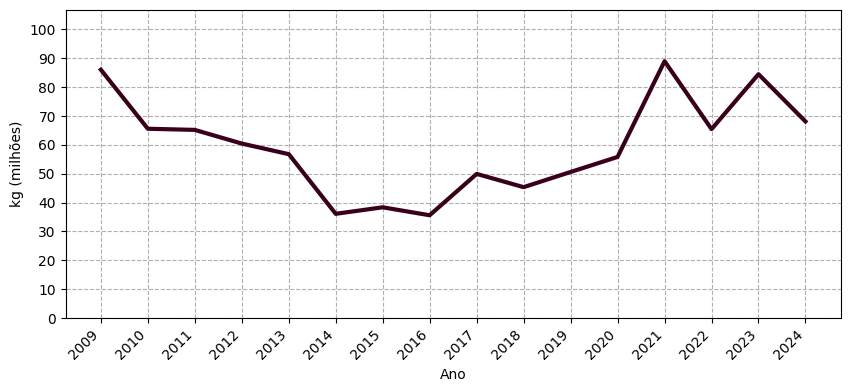

In [23]:
# fig, ax = plt.subplots()
fig = my.set_figsize(size_squash_mild)
df = df_exports_total_by_year
plt.plot('ano', 'kg', data=df, label=None, linewidth=line_width)
max = df_exports_total_by_year.max()['kg']
ax = plt.gca()

my.set_y_lim(df, 'kg')
my.set_labels('Ano', 'kg (milhões)')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,10,0,'y')
my.rotate_label()

my.add_grid(ax)

my.export_fig(f'{suffix}_total')

In [24]:
df_exports_by_country['pais_destino'].unique()

array(['Afeganistão', 'Africa do Sul', 'Alemanha', 'Angola', 'Anguilla',
       'Antigua e Barbuda', 'Antilhas Holandesas', 'Antígua e Barbuda',
       'Arabia Saudita', 'Argentina', 'Argélia', 'Aruba',
       'Arábia Saudita', 'Austrália', 'Bahamas', 'Bahrein', 'Bangladesh',
       'Barbados', 'Barein', 'Belgica', 'Belize', 'Benin', 'Bermudas',
       'Birmânia', 'Bolívia', 'Brasil', 'Bulgária', 'Burquina Faso',
       'Bélgica', 'Bósnia-Herzegovina', 'Cabo Verde', 'Camarões',
       'Camores', 'Canadá', 'Catar', 'Cayman, Ilhas', 'Chile', 'China',
       'Chipre', 'Cingapura', 'Cocos (Keeling), Ilhas', 'Colômbia',
       'Comores', 'Congo', 'Cook, Ilhas', 'Coreia do Norte',
       'Coreia do Sul', 'Costa Rica', 'Costa do Marfim', 'Coveite',
       'Croácia', 'Cuba', 'Curaçao', 'Dinamarca', 'Djibuti', 'Dominica',
       'Egito', 'El Salvador', 'Emirados Árabes Unidos', 'Equador',
       'Eslovaca, Republica', 'Eslovênia', 'Espanha', 'Estados Unidos',
       'Estônia', 'Falkland (Malvin

#### Por categoria

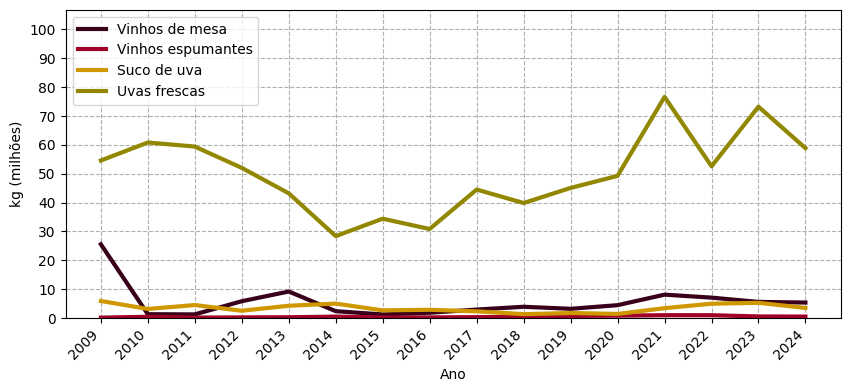

In [25]:
# fig, ax = plt.subplots()
my.set_figsize(size_squash_mild)
for kind in export_type:
    filter = df_exports_by_year_by_type['tipo'] == kind
    df = df_exports_by_year_by_type.loc[filter]
    plt.plot('ano', 'kg', data=df, color=type_color[kind], label=kind, linewidth=line_width)

ax = plt.gca()
my.add_grid(ax)
plt.legend()

my.set_labels('Ano', 'kg (milhões)')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,10,0,'y')
my.rotate_label()
my.set_y_lim(df_exports_million.groupby('ano').sum(numeric_only=True).reset_index(), 'kg')

my.export_fig(f'{suffix}_categorias')

#### Por país

In [26]:
# top5_weight_by_country = df_exports_by_country.sort_values('kg',ascending=False).head(5).reset_index()['pais_destino']
top_weight_by_country = my.get_top(df_exports_by_country, 'kg', 'pais_destino', 10)
top_weight_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Paraguai
5            Rússia
6          Alemanha
7         Argentina
8           Espanha
9           Romênia
Name: pais_destino, dtype: object

In [27]:
df_exports_total_by_year

,ano,categoria,kg,valor,valor_por_kg
0,2009-01-01,0.0,86.023485,132.483328,1.540083
1,2010-01-01,0.0,65.570616,148.387866,2.263024
2,2011-01-01,0.0,65.170313,155.704050,2.389187
3,2012-01-01,0.0,60.439702,135.953307,2.249404
4,2013-01-01,0.0,56.755915,139.095767,2.450771
5,2014-01-01,0.0,36.077345,89.238836,2.473542
6,2015-01-01,0.0,38.338590,81.655009,2.129839
7,2016-01-01,0.0,35.583010,77.326129,2.173119
8,2017-01-01,0.0,49.914400,110.857951,2.220961
9,2018-01-01,0.0,45.319878,99.656244,2.198952


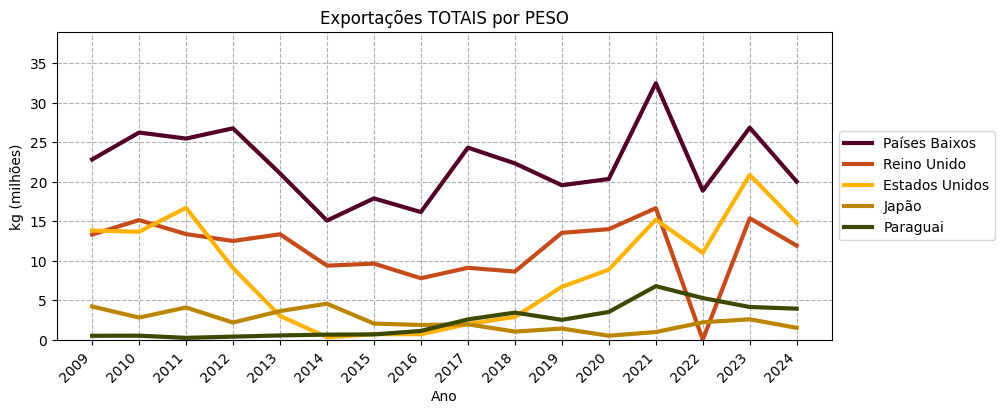

In [28]:
fig = my.set_figsize(size_squash_mild)
my.set_axes_cycler(cycler_rotation)

for country in top_weight_by_country[:5]:
    df = df_exports_by_country_by_year.loc[df_exports_by_country_by_year['pais_destino'] == country]
    plt.plot('ano','kg', data=df, label=country, linewidth=line_width)
ax = plt.gca()
my.move_legend()

my.rotate_label()
my.set_y_lim(df_exports_by_country_by_year, 'kg')
my.set_labels('Ano','kg (milhões)')
my.ticks_on_years(ax)
my.add_grid(ax)
plt.title('Exportações TOTAIS por PESO')

my.export_fig(f'{suffix}_paises')

#### Top 10 países por categoria 

In [29]:
def make_line_graph_of_type(type):
    fig = my.set_figsize(size_squash_mild)
    filter = df_exports_by_type_by_country_by_year['tipo'] == type
    df_type = df_exports_by_type_by_country_by_year.loc[filter]
    df_exports_by_type_top5 = my.get_top(
        df_exports_by_country_by_type_ri.loc[
            df_exports_by_country_by_type_ri['tipo'] == type],
        'kg', 'pais_destino',5)
    ax = plt.gca()

    my.set_axes_cycler(cycler_rotation)

    for country in df_exports_by_type_top5:
        df = df_type.loc[df_type['pais_destino'] == country]
        plt.plot('ano','kg', data=df, label=country, linewidth=line_width)

    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    my.rotate_label()

    my.set_y_lim(df_type, 'kg')
    plt.title(f'Exportações TOTAIS de {type.lower()} por PESO')
    my.set_labels('Ano','kg (milhões)')
    my.ticks_on_years(ax)
    my.add_grid(ax)

    my.export_fig(f'{suffix}_{type}_paises')

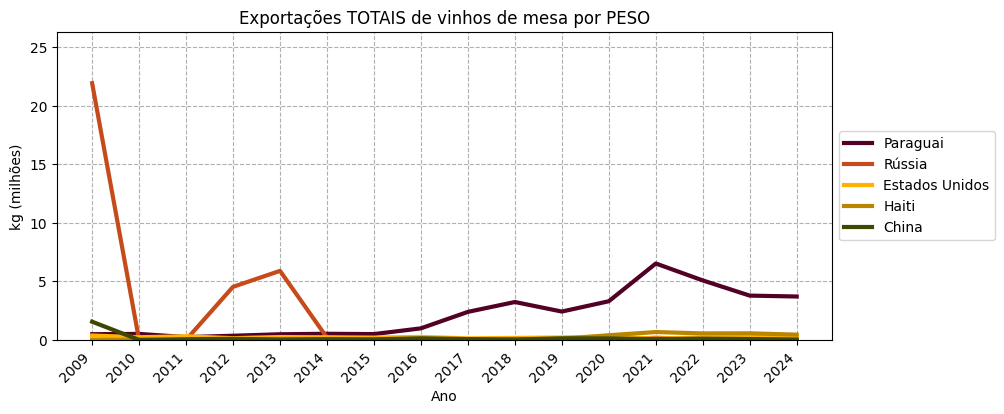

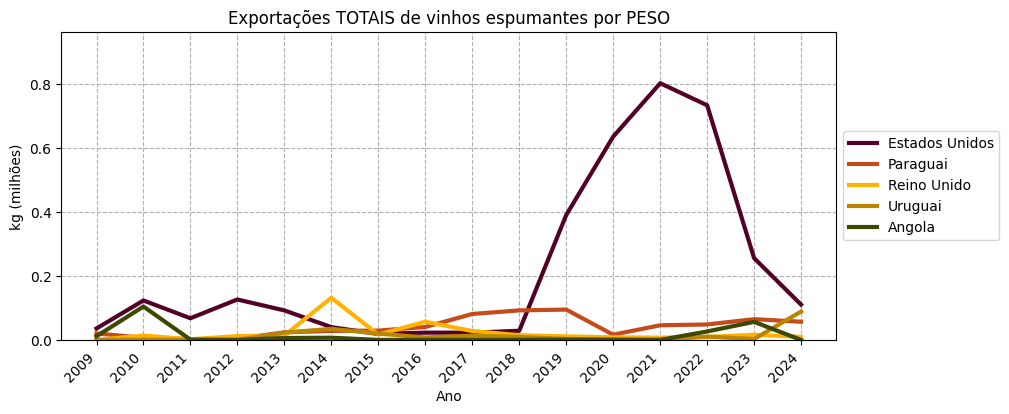

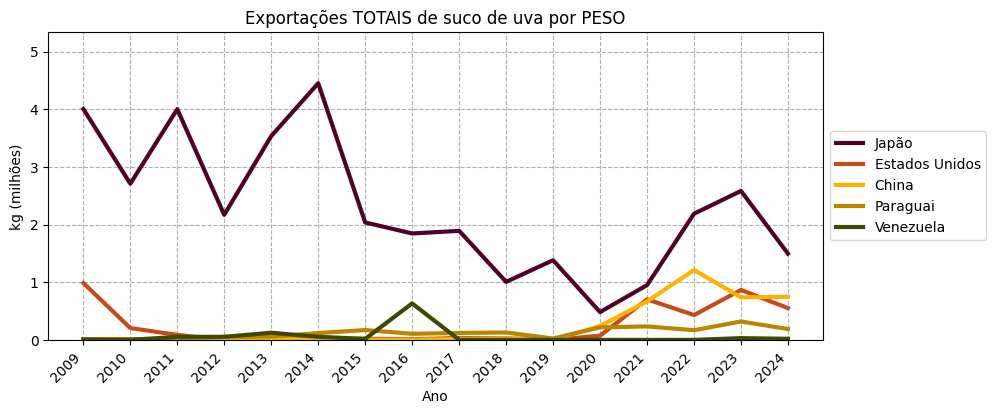

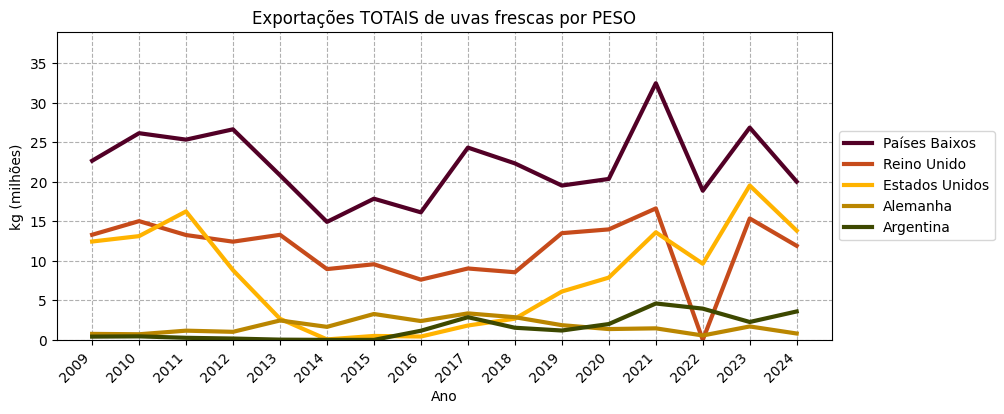

In [30]:
for type in type_color_name.keys():
    make_line_graph_of_type(type)

### Qual país mais comprou nos últimos 15 anos, por volume total?

In [31]:
top_weight_by_country = my.get_top(df_exports_by_country,'kg',
                                    'pais_destino',10)
top_weight_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Paraguai
5            Rússia
6          Alemanha
7         Argentina
8           Espanha
9           Romênia
Name: pais_destino, dtype: object

In [32]:
media = df_exports_by_country['kg'].mean()
media_top10 = df_exports_by_country.sort_values('kg',ascending=False)['kg'].head(10).mean()
media, media_top10

(np.float64(5.1769377934782606), np.float64(88.05479290000001))

In [33]:
def make_bar_graph(df : pd.DataFrame, xlabel : str, ylabel : str, xtick_rotation : int = 45, stacked : bool = False, color_dict : dict = type_color):
    axis = df.plot(kind='bar',
                   stacked = stacked,
                   color = [color_dict.get(x, '#333333') for x in df.columns])
    
    plt.xlabel('País')
    plt.ylabel('kg (milhões)')
    plt.xticks(rotation=45, ha='right')

    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)

    return axis

In [34]:
df = df_exports_million.loc[df_exports['pais_destino'].isin(top_weight_by_country)].groupby(['pais_destino','tipo']).sum(True)
df.head()

categoria         kg      valor  valor_por_kg
pais_destino tipo                                                            
Alemanha     Suco de uva              0.0   0.038742   0.023523     16.437066
             Uvas frescas             0.0  27.419658  56.933674     33.609343
             Vinhos de mesa           0.0   0.654781   2.196372     78.890158
             Vinhos espumantes        0.0   0.073326   0.352395     84.721086
Argentina    Suco de uva              0.0   0.044001   0.250348     82.353706

In [35]:
df = df.reindex(top_weight_by_country,level=0) # reorders them

In [36]:
df = df['kg'].unstack().reset_index()
df.head()

tipo,pais_destino,Suco de uva,Uvas frescas,Vinhos de mesa,Vinhos espumantes
0,Países Baixos,0.212593,355.299971,0.901060,0.030701
1,Reino Unido,0.044994,182.420812,1.165560,0.349253
2,Estados Unidos,4.041101,129.403203,3.659709,3.498767
3,Japão,36.726935,0.003343,1.001661,0.143430
4,Paraguai,1.943596,0.006782,34.508515,0.652864


In [37]:
df.columns[1:]
suffix = 'peso_bar'

<Figure size 1000x400 with 0 Axes>

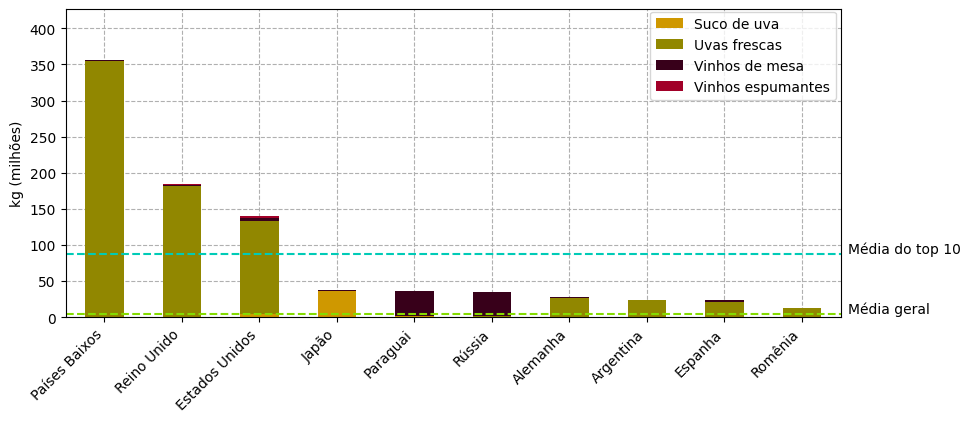

In [38]:
fig = my.set_figsize(size_squash_mild)
ax = df.plot(kind='bar',x='pais_destino',stacked=True, color = [type_color.get(x, '#333333') for x in df.columns[1:]], figsize=size_squash_mild)


ax.legend(loc='center left', bbox_to_anchor=(0.745,  0.85))
my.rotate_label()
my.set_y_lim(df, 'Uvas frescas')
ax.set_xlabel('')
ax.set_ylabel('kg (milhões)')
my.add_horizontal_line(ax, media, 'Média geral', colors_accent[0])
my.add_horizontal_line(ax, media_top10, 'Média do top 10', colors_accent[1])
my.add_grid(ax)

my.export_fig(f'{suffix}_pais-categorias')

In [39]:
# df_exports_by_country_top5_categories_unstack = df.reindex(index=top5_weight_by_country,level=0).unstack()
# axis = make_bar_graph(df_exports_by_country_top5_categories_unstack, 'País', 'kg (milhões)', stacked=True)

In [40]:
filtro = df_exports_by_country_by_type_ri['tipo'] == type
df_exports_by_country_by_type_ri.loc[filtro].mean(numeric_only=True)

categoria        0.000000
kg               5.738160
valor           12.915619
valor_por_kg     3.650074
dtype: float64

### Por categoria

In [41]:
def make_bar_graph_category (type : str):
    filtro = df_exports_by_country_by_type_ri['tipo'] == type
    df = df_exports_by_country_by_type_ri.loc[filtro][['pais_destino','kg']].sort_values('kg',ascending=False)
    axis = df.head(10).plot(kind='bar', x='pais_destino', y='kg', color=type_color[type], figsize=size_squash_mild)
    axis.legend([type])
    plt.xlabel('')
    plt.ylabel('kg (milhões)')
    plt.xticks(rotation=45, ha='right')
    my.add_grid(axis)
    my.set_y_lim(df, 'kg', 0.1)
    my.rotate_label(25, 'right')
    axis.set_ylim(0,axis.get_ylim()[1]*1.2)
    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)

    media = round(df['kg'].mean(),2)
    media_top10 = round(df['kg'].head(10).mean(),2)

    my.add_horizontal_line(axis, media, 'Média geral', colors_accent[0])
    my.add_horizontal_line(axis, media_top10, 'Média do top 10', colors_accent[1])

    ax.get_xlim()

    my.export_fig(f'{suffix}_{type}')
    return axis

<Axes: ylabel='kg (milhões)'>

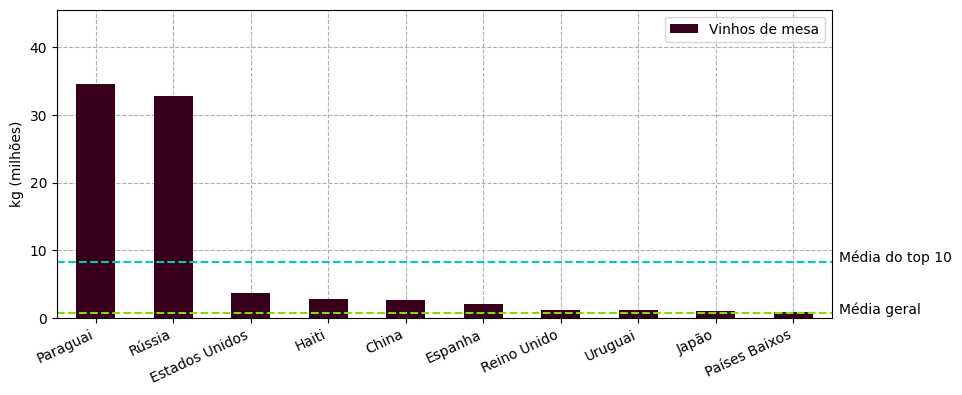

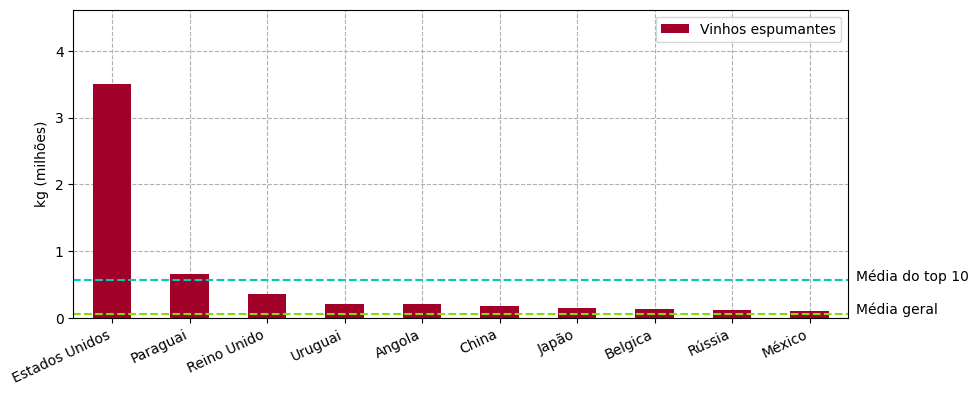

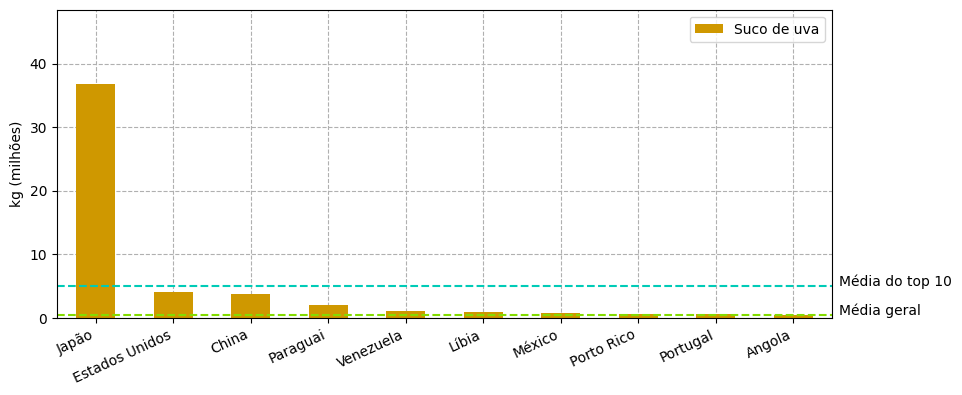

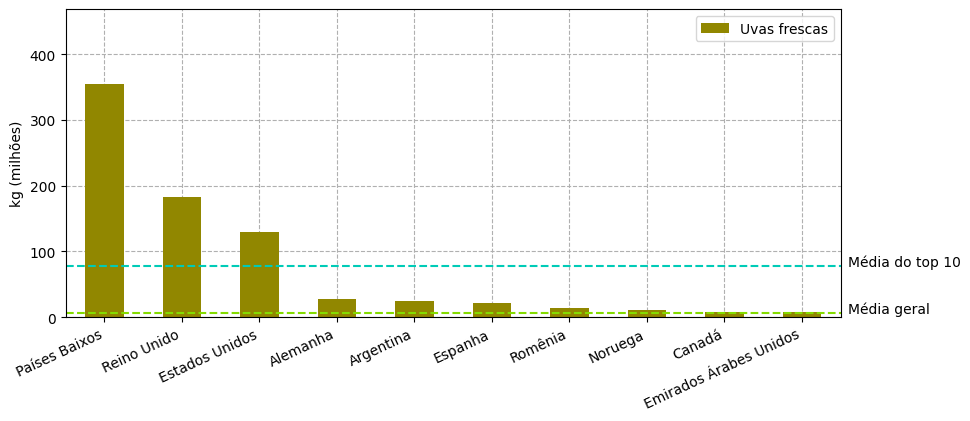

In [42]:
type = 'Vinhos de mesa'
make_bar_graph_category(type)
type = 'Vinhos espumantes'
make_bar_graph_category(type)
type = 'Suco de uva'
make_bar_graph_category(type)
type = 'Uvas frescas'
make_bar_graph_category(type)

In [43]:
filter = df_exports_by_country_by_type_ri['tipo'] == 'Vinhos de mesa'
df_exports_by_country_by_type_ri_total = df_exports_by_country_by_type_ri.loc[filter].groupby('pais_destino').sum(numeric_only=True)
df_exports_by_country_by_type_ri_total

,categoria,kg,valor,valor_por_kg
pais_destino,,,,
Afeganistão,0.0,0.000011,0.000046,4.181818
Alemanha,0.0,0.654781,2.196372,3.354361
Angola,0.0,0.143147,0.505106,3.528583
Anguilla,0.0,0.000000,0.000000,0.000000
Antilhas Holandesas,0.0,0.079064,0.120007,1.517846
...,...,...,...,...
Venezuela,0.0,0.319467,0.508758,1.592521
Vietnã,0.0,0.009887,0.013182,1.333266
África do Sul,0.0,0.000250,0.002597,10.388000


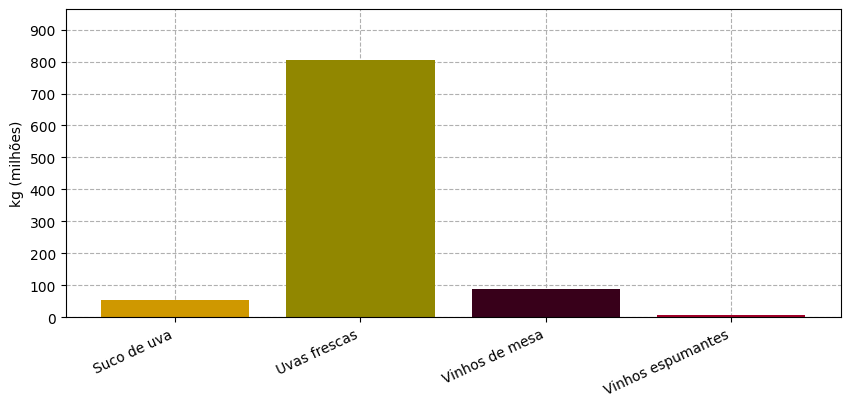

In [44]:
df = df_exports_by_type

fig = my.set_figsize(size_squash_mild)

plt.bar('tipo', 'kg',data=df, color = [type_color.get(x, '#333333') for x in df['tipo']])
ax = plt.gca()
my.set_labels(y='kg (milhões)')
my.ticks_per_interval(ax, 100, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'kg')
my.rotate_label(25, 'right')

my.export_fig(f'{suffix}_categorias_total')

In [45]:
uvas = float(df_exports_by_type.loc[df_exports_by_type['tipo'] == 'Uvas frescas']['kg'])
vinhos = float(df_exports_by_type.loc[df_exports_by_type['tipo'] == 'Vinhos de mesa']['kg'])
uvas / vinhos

D:\Temp\ipykernel_37996\3979357317.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  uvas = float(df_exports_by_type.loc[df_exports_by_type['tipo'] == 'Uvas frescas']['kg'])
D:\Temp\ipykernel_37996\3979357317.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vinhos = float(df_exports_by_type.loc[df_exports_by_type['tipo'] == 'Vinhos de mesa']['kg'])


9.077369769773291

In [46]:
max = df_exports_by_type['kg'].max()
df = df_exports_by_type 
df['peso_relativo'] = df_exports_by_type['kg']/max
df

,tipo,categoria,kg,valor,valor_por_kg,peso_relativo
0,Suco de uva,0.0,54.077895,132.955442,2.458591,0.067316
1,Uvas frescas,0.0,803.342341,1808.186594,2.250829,1.000000
2,Vinhos de mesa,0.0,88.499462,123.200567,1.392105,0.110164
3,Vinhos espumantes,0.0,6.636856,22.831986,3.440181,0.008262


### Conclusões
- Por PESO TOTAL, nos ÚLTIMOS 15 ANOS, quem mais comprou foram os PAÍSES BAIXOS

## Qual país trouxe MAIS DINHEIRO, no total?

In [47]:
df_exports_by_country_total_sort_by_value = df_exports_by_country.sort_values('valor',ascending=False)
df_exports_by_country_total_sort_by_value.head(20)

,pais_destino,categoria,kg,valor,valor_por_kg,continente
137,Países Baixos,0.0,356.444325,753.357290,2.113534,Europa
146,Reino Unido,0.0,183.980619,431.261744,2.344061,Europa
63,Estados Unidos,0.0,140.602780,359.175130,2.554538,América do Norte
97,Japão,0.0,37.875369,100.170258,2.644734,Ásia
2,Alemanha,0.0,28.186507,59.505964,2.111151,Europa
136,Paraguai,0.0,37.111757,52.449043,1.413273,América do Sul
9,Argentina,0.0,24.651966,50.480786,2.047739,América do Sul
62,Espanha,0.0,23.577630,43.825182,1.858761,Europa
128,Noruega,0.0,10.997250,30.558272,2.778719,Europa
151,Romênia,0.0,13.194830,28.569808,2.165227,Europa


In [48]:
top_value_by_country = my.get_top(df_exports_by_country_total_sort_by_value,'valor','pais_destino',10)
top_value_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Alemanha
5          Paraguai
6         Argentina
7           Espanha
8           Noruega
9           Romênia
Name: pais_destino, dtype: object

In [49]:
df = df_exports_by_country_by_type['valor'].unstack().reset_index()
df = df.loc[df['pais_destino'].isin(top_value_by_country)]
df['pais_destino'] = pd.Categorical(df.pais_destino, top_value_by_country, ordered=True)
df = df.sort_values('pais_destino')
df

tipo,pais_destino,Suco de uva,Uvas frescas,Vinhos de mesa,Vinhos espumantes
137,Países Baixos,0.542202,749.619273,3.035719,0.160096
146,Reino Unido,0.091936,424.769475,4.747648,1.652685
63,Estados Unidos,8.621653,330.412322,9.957775,10.183380
97,Japão,97.279630,0.010816,2.324119,0.555693
2,Alemanha,0.023523,56.933674,2.196372,0.352395
136,Paraguai,2.581019,0.008225,47.984063,1.875736
9,Argentina,0.250348,49.621718,0.425513,0.183207
62,Espanha,0.053310,39.858516,3.807951,0.105405
128,Noruega,0.011071,30.096182,0.268880,0.182139
151,Romênia,NaN,28.569808,NaN,NaN


In [50]:
media = df_exports_by_country['valor'].mean()
media_top10 = df_exports_by_country.sort_values('valor',ascending=False)['valor'].head(10).mean()
media, media_top10

(np.float64(11.343340157608694), np.float64(190.9353477))

In [51]:
suffix = 'valor_'

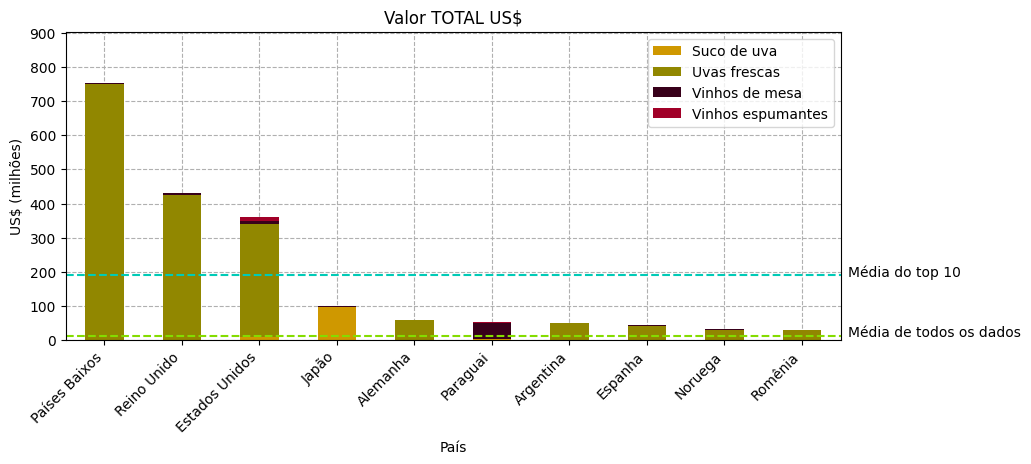

In [52]:
ax = df.plot(kind='bar', x='pais_destino', stacked=True,
               color = [type_color.get(x, '#333333') for x in df.columns[1:]], figsize=size_squash_mild)
my.add_grid(ax)
plt.legend()

my.set_labels('País', 'US$ (milhões)')
my.rotate_label()
my.set_y_lim(df_exports_by_country, 'valor')
my.ticks_per_interval(ax, 100,0,'y')
ax.axhline(media, c=colors_accent[0],ls='--')
ax.axhline(media_top10, c=colors_accent[1], ls='--')
ax.text(ax.get_xlim()[1]+0.1, media_top10 - 5,'Média do top 10')
ax.text(ax.get_xlim()[1]+0.1, media - 2,'Média de todos os dados')

plt.title('Valor TOTAL US$');

my.export_fig(f'{suffix}bar_pais')

In [53]:
def make_bar_graph_category_value (type : str):
    filtro = df_exports_by_country_by_type_ri['tipo'] == type
    df = df_exports_by_country_by_type_ri.loc[filtro][['pais_destino','valor']].sort_values('valor',ascending=False)
    axis = df.head(10).plot(kind='bar', x='pais_destino', y='valor', color=type_color[type], figsize=size_squash_mild)
    axis.legend([type])
    plt.xlabel('')
    plt.ylabel('US$ (milhões)')
    plt.xticks(rotation=45, ha='right')
    my.add_grid(axis)
    my.set_y_lim(df, 'valor', 0.1)
    my.rotate_label(25, 'right')
    axis.set_ylim(0,axis.get_ylim()[1]*1.2)
    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)

    media = round(df['valor'].mean(),2)
    media_top10 = round(df['valor'].head(10).mean(),2)

    my.add_horizontal_line(axis, media, 'Média geral', colors_accent[0])
    my.add_horizontal_line(axis, media_top10, 'Média do top 10', colors_accent[1])

    ax.get_xlim()

    my.export_fig(f'{suffix}_bar_{type}')
    return axis

<Axes: ylabel='US$ (milhões)'>

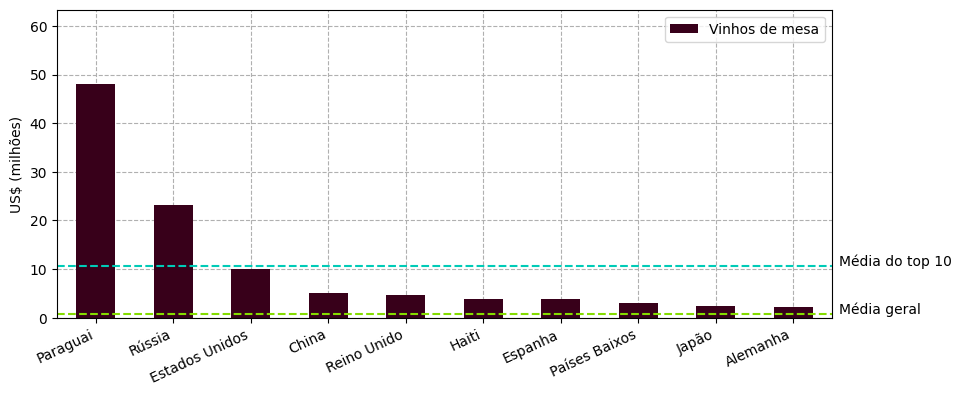

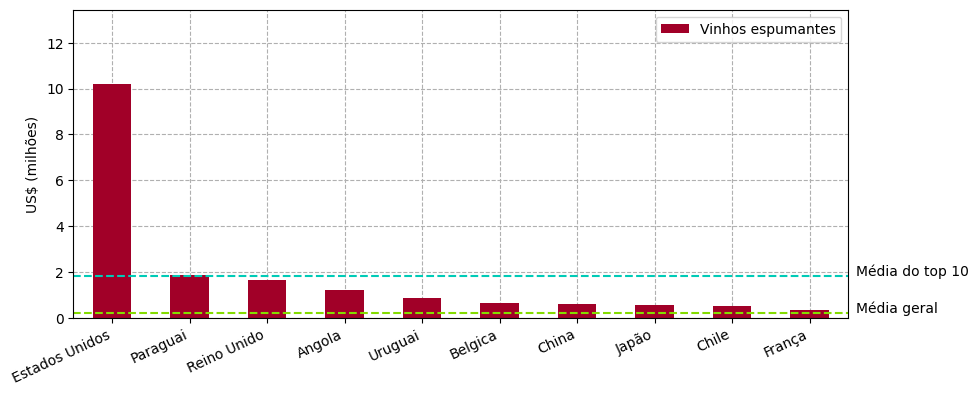

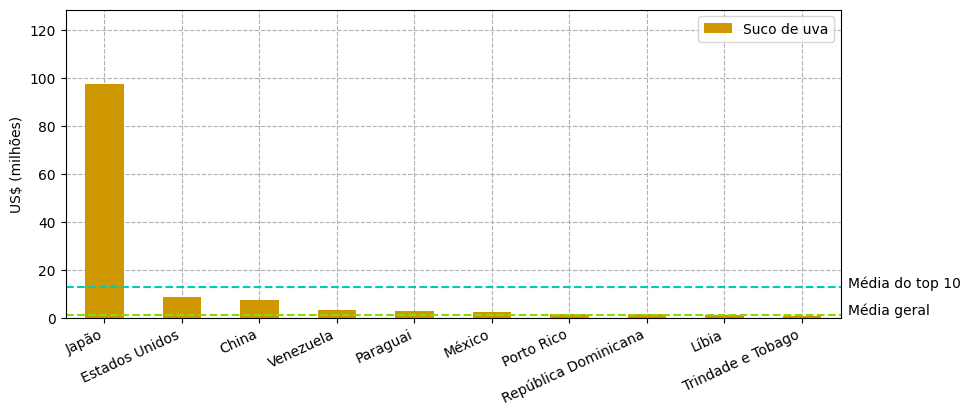

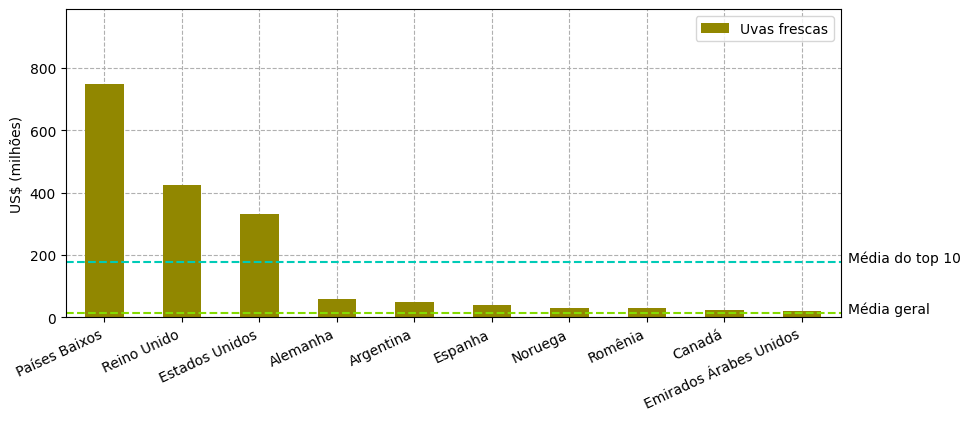

In [54]:
type = 'Vinhos de mesa'
make_bar_graph_category_value(type)
type = 'Vinhos espumantes'
make_bar_graph_category_value(type)
type = 'Suco de uva'
make_bar_graph_category_value(type)
type = 'Uvas frescas'
make_bar_graph_category_value(type)

### Linha do tempo

In [55]:
suffix = 'valor_linha_'

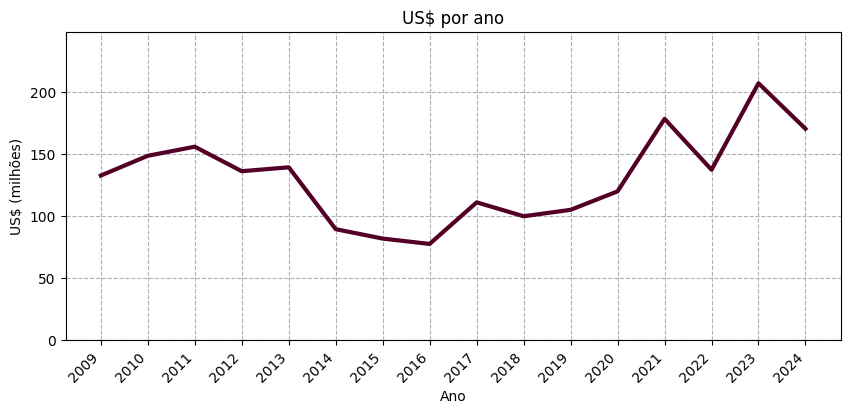

In [56]:
fig = my.set_figsize(size_squash_mild)
my.set_axes_cycler(cycler_rotation)

plt.plot('ano','valor', data=df_exports_total_by_year, label=country, linewidth=line_width)
ax = plt.gca()

my.rotate_label()
my.set_y_lim(df_exports_total_by_year, 'valor')
my.set_labels('Ano','US$ (milhões)')
my.ticks_on_years(ax)
my.add_grid(ax)
plt.title('US$ por ano')

my.export_fig(f'{suffix}total')

## Qual PRODUTO touxe mais dinheiro?

In [57]:
top_value_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Alemanha
5          Paraguai
6         Argentina
7           Espanha
8           Noruega
9           Romênia
Name: pais_destino, dtype: object

In [58]:
def make_line_graph_of_type_value(type):
    fig = my.set_figsize(size_squash_mild)
    filter = df_exports_by_type_by_country_by_year['tipo'] == type
    df_type = df_exports_by_type_by_country_by_year.loc[filter]
    df_exports_by_type_top5 = my.get_top(
        df_exports_by_country_by_type_ri.loc[
            df_exports_by_country_by_type_ri['tipo'] == type],
        'valor', 'pais_destino',5)
    ax = plt.gca()

    my.set_axes_cycler(cycler_rotation)

    for country in df_exports_by_type_top5:
        df = df_type.loc[df_type['pais_destino'] == country]
        plt.plot('ano','valor', data=df, label=country, linewidth=line_width)

    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    my.rotate_label()

    my.set_y_lim(df_type, 'valor')
    plt.title(f'Valor TOTAL de {type.lower()}')
    my.set_labels('Ano','US$ (milhões)')
    my.ticks_on_years(ax)
    my.add_grid(ax)

    my.export_fig(f'{suffix}{type}_paises')

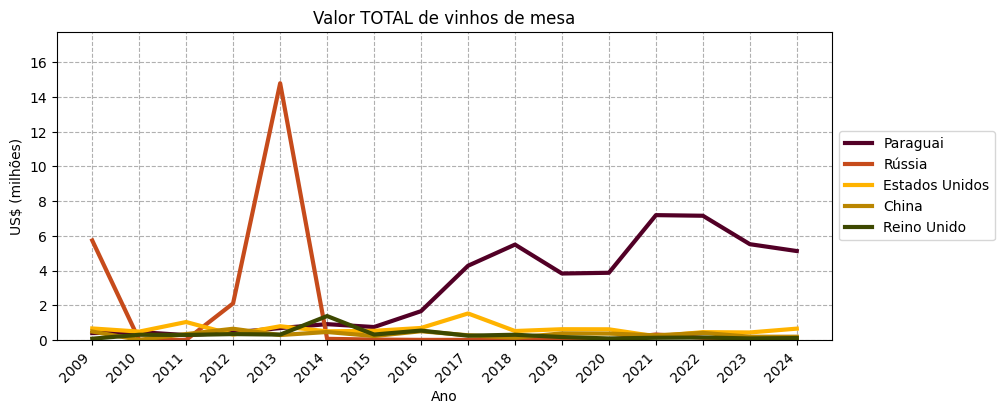

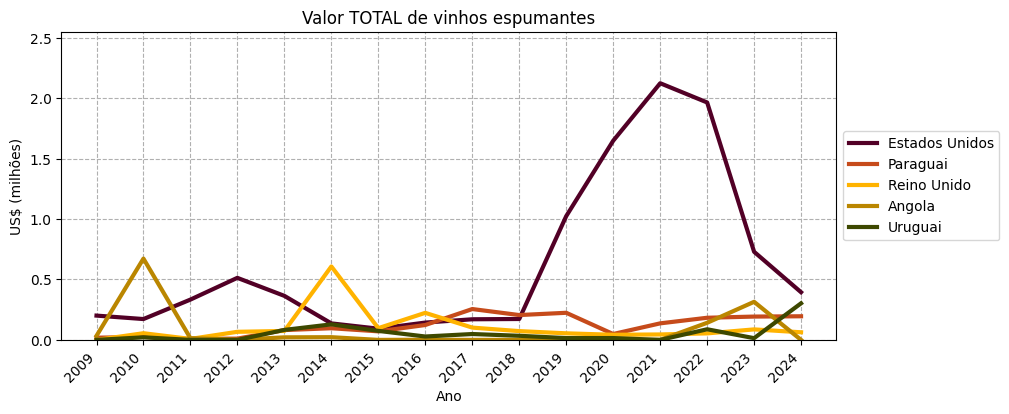

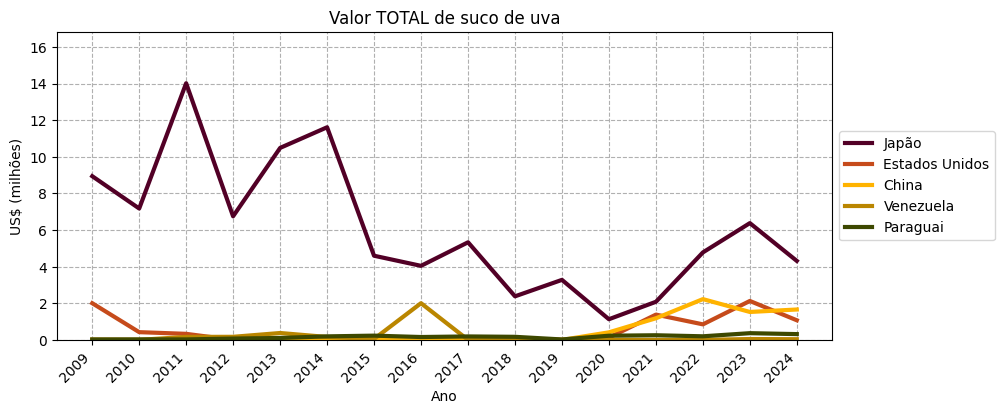

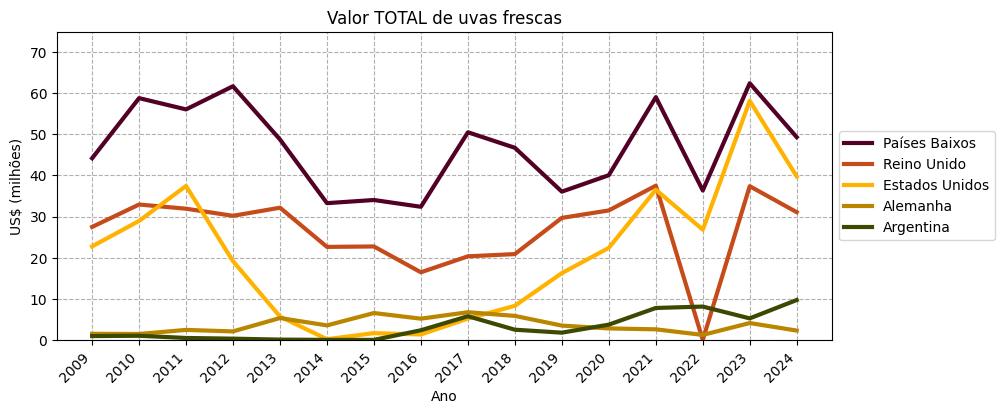

In [59]:
for type in type_color_name.keys():
    make_line_graph_of_type_value(type)

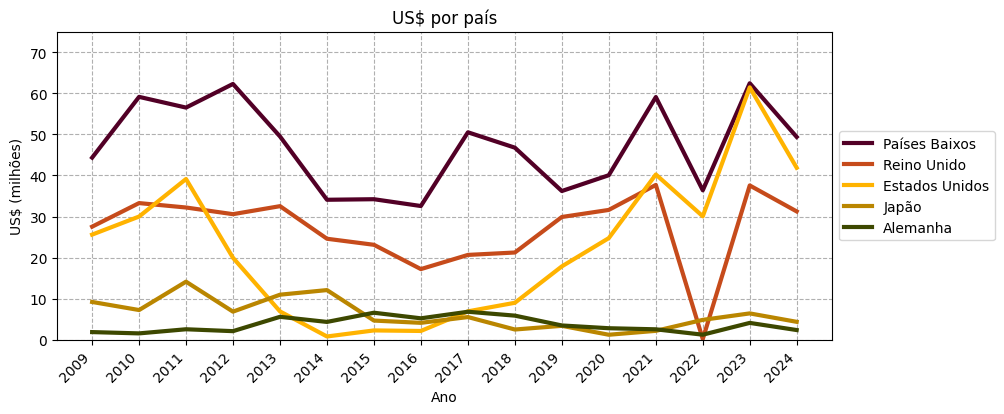

In [60]:
fig = my.set_figsize(size_squash_mild)
my.set_axes_cycler(cycler_rotation)

for country in top_value_by_country[:5]:
    df = df_exports_by_country_by_year.loc[df_exports_by_country_by_year['pais_destino'] == country]
    plt.plot('ano','valor', data=df, label=country, linewidth=line_width)
my.move_legend()

ax = plt.gca()

my.rotate_label()
my.set_y_lim(df_exports_by_country_by_year, 'valor')
my.set_labels('Ano','US$ (milhões)')
my.ticks_on_years(ax)
my.add_grid(ax)
plt.title('US$ por país')

my.export_fig(f'{suffix}pais')

### Linha do tempo

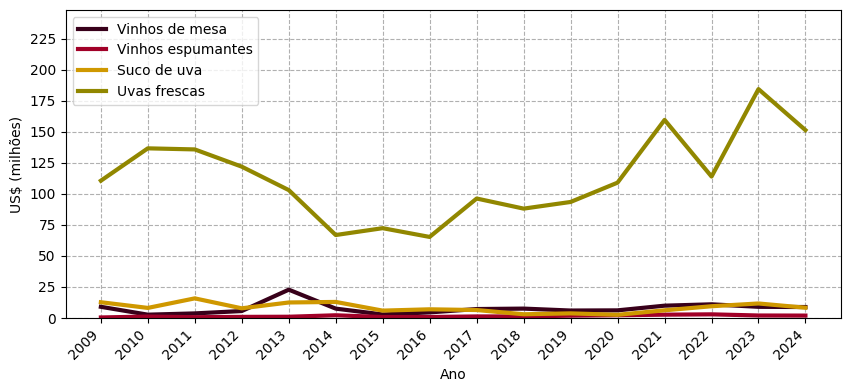

In [61]:
fig = my.set_figsize(size_squash_mild)

for kind in export_type:
    filter = df_exports_by_year_by_type['tipo'] == kind
    df = df_exports_by_year_by_type.loc[filter]
    plt.plot('ano', 'valor', data=df, color=type_color[kind], label=kind, linewidth=line_width)
ax = plt.gca()
my.add_grid(ax)
plt.legend()

my.set_labels('Ano', 'US$ (milhões)')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,25,0,'y')
my.rotate_label()
my.set_y_lim(df_exports_million.groupby('ano').sum(numeric_only=True).reset_index(), 'valor')

my.export_fig(f'{suffix}categorias')

### No TOTAL

In [62]:
suffix = 'valor_bar_'

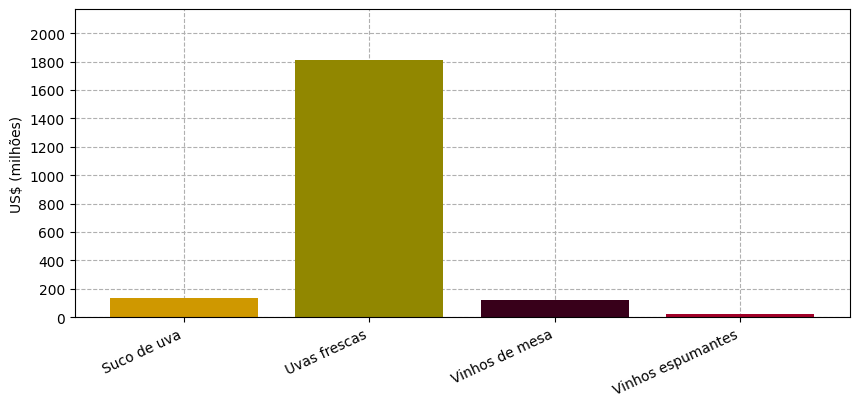

In [63]:
df = df_exports_by_type

fig = my.set_figsize(size_squash_mild)

plt.bar('tipo', 'valor',data=df, color = [type_color.get(x, '#333333') for x in df['tipo']])
ax = plt.gca()
my.set_labels(y='US$ (milhões)')
my.ticks_per_interval(ax, 200, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'valor')
my.rotate_label(25, 'right')

my.export_fig(f'{suffix}categorias')

In [64]:
max = df_exports_by_type['valor'].max()
df = df_exports_by_type 
df['valor_relativo'] = df_exports_by_type['valor']/max
df

,tipo,categoria,kg,valor,valor_por_kg,peso_relativo,valor_relativo
0,Suco de uva,0.0,54.077895,132.955442,2.458591,0.067316,0.073530
1,Uvas frescas,0.0,803.342341,1808.186594,2.250829,1.000000,1.000000
2,Vinhos de mesa,0.0,88.499462,123.200567,1.392105,0.110164,0.068135
3,Vinhos espumantes,0.0,6.636856,22.831986,3.440181,0.008262,0.012627


## Qual produto trouxe MAIS DINHEIRO POR KG?

In [65]:
suffix = 'valorPorKg_bar_'

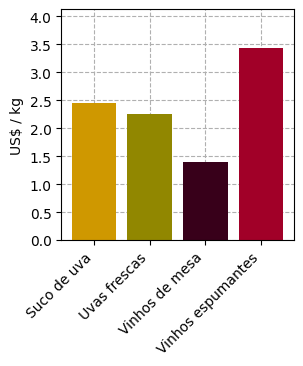

In [66]:
df = df_exports_by_type

fig = my.set_figsize(size_stretch_mild)

plt.bar('tipo', 'valor_por_kg',data=df, color = [type_color.get(x, '#333333') for x in df['tipo']])
ax = plt.gca()
my.set_labels(y='US$ / kg')
my.ticks_per_interval(ax, 0.5, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'valor_por_kg')
my.rotate_label(45, 'right')

my.export_fig(f'{suffix}categorias')

In [67]:
filter_hundredthousand = df_exports_by_country['kg'] > 0.1
country_list = df_exports_by_country.loc[filter_hundredthousand].sort_values('kg',ascending=False)['pais_destino'].unique()

In [68]:
df = df_exports_million.loc[df_exports_million['pais_destino'].isin(country_list)]
df = df.groupby('tipo').sum(True).reset_index()
df['valor_por_kg'] = df['valor']/df['kg']
df

,tipo,categoria,kg,valor,valor_por_kg
0,Suco de uva,0.0,53.631470,131.893961,2.459264
1,Uvas frescas,0.0,802.988316,1806.838678,2.250143
2,Vinhos de mesa,0.0,87.835703,121.078803,1.378469
3,Vinhos espumantes,0.0,6.546624,22.354464,3.414655


In [69]:
top_weight_by_country

0     Países Baixos
1       Reino Unido
2    Estados Unidos
3             Japão
4          Paraguai
5            Rússia
6          Alemanha
7         Argentina
8           Espanha
9           Romênia
Name: pais_destino, dtype: object

In [70]:
df = df_exports_by_country.sort_values('valor_por_kg',ascending=False)
df = df.loc[df['pais_destino'].isin(top_weight_by_country)]
df

,pais_destino,categoria,kg,valor,valor_por_kg,continente
97,Japão,0.0,37.875369,100.170258,2.644734,Ásia
63,Estados Unidos,0.0,140.602780,359.175130,2.554538,América do Norte
146,Reino Unido,0.0,183.980619,431.261744,2.344061,Europa
151,Romênia,0.0,13.194830,28.569808,2.165227,Europa
137,Países Baixos,0.0,356.444325,753.357290,2.113534,Europa
2,Alemanha,0.0,28.186507,59.505964,2.111151,Europa
9,Argentina,0.0,24.651966,50.480786,2.047739,América do Sul
62,Espanha,0.0,23.577630,43.825182,1.858761,Europa
136,Paraguai,0.0,37.111757,52.449043,1.413273,América do Sul
152,Rússia,0.0,34.922146,27.440663,0.785767,Europa


In [71]:
df_exports_by_country_by_type.sort_values('kg').tail(10)

,,categoria,kg,valor,valor_por_kg
pais_destino,tipo,,,,
Romênia,Uvas frescas,0.0,13.194830,28.569808,6.465221
Espanha,Uvas frescas,0.0,21.482494,39.858516,22.346573
Argentina,Uvas frescas,0.0,24.507646,49.621718,27.989982
Alemanha,Uvas frescas,0.0,27.419658,56.933674,33.609343
Rússia,Vinhos de mesa,0.0,32.822197,23.152054,19.337654
Paraguai,Vinhos de mesa,0.0,34.508515,47.984063,21.964577
Japão,Suco de uva,0.0,36.726935,97.279630,41.143455
Estados Unidos,Uvas frescas,0.0,129.403203,330.412322,42.632590
Reino Unido,Uvas frescas,0.0,182.420812,424.769475,35.008343


d:\_FIAP\01.Git\Challenge\my_functions.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=bbox)


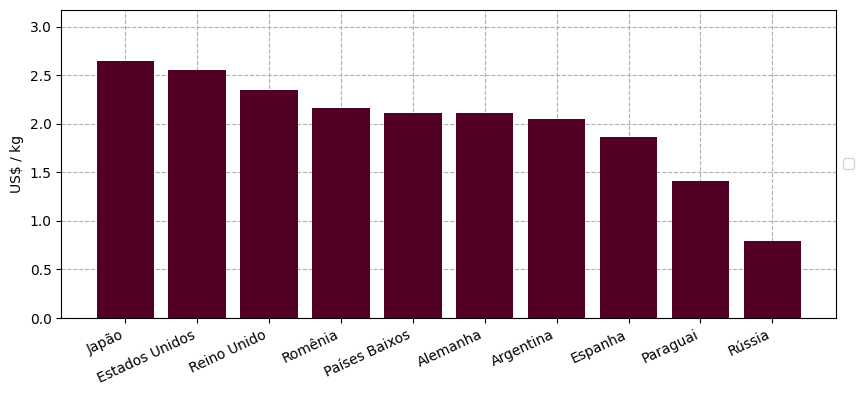

In [72]:
fig = my.set_figsize(size_squash_mild)
plt.bar('pais_destino','valor_por_kg', data=df)
ax = plt.gca()
my.move_legend()

my.rotate_label()
my.set_labels('','US$ / kg')
my.ticks_per_interval(ax, 0.5, 0, axis='y')
my.add_grid(ax)
my.set_y_lim(df, 'valor_por_kg')
my.rotate_label(25, 'right')

my.export_fig(f'valorPorKg_bar_paises')

In [73]:
def valueByKgBarGraph(category):
    df = df_exports_by_country_by_type_ri.loc[df_exports_by_country_by_type_ri['tipo'] == category]
    top10 = my.get_top(df,'kg','pais_destino',10)
    df = df.loc[df['pais_destino'].isin(top10)].sort_values('valor_por_kg',ascending=False)
    gen_top10 = my.get_top(df_exports_by_country_by_type_ri,'kg','pais_destino',5)
    
    axis = df.plot(kind='bar', x='pais_destino', y='valor_por_kg', color=type_color[category], figsize=size_stretch_mild)
    plt.xlabel('')
    plt.title(f'{category}')
    plt.legend()
    plt.ylabel('US$ / kg')
    plt.xticks(rotation=45, ha='right')
    plt.gca().get_legend().remove()
    my.add_grid(axis)
    my.set_y_lim(df_exports_by_country_by_type_ri.loc[df_exports_by_country_by_type_ri['pais_destino'].isin(gen_top10)], 'valor_por_kg', 0.2)
    my.rotate_label(90, 'center')
    axis.set_axisbelow(True)
    plt.grid(axis='y', zorder=-1)
    my.export_fig(f'valorPorKg_bar_{category}_paises')

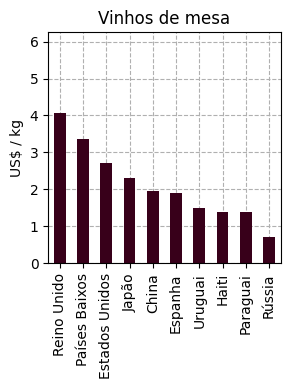

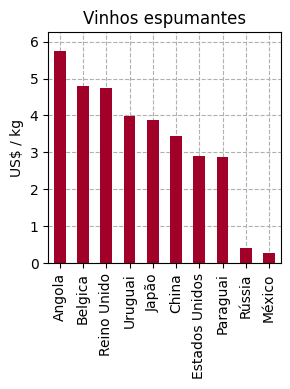

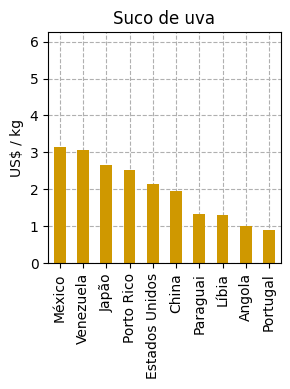

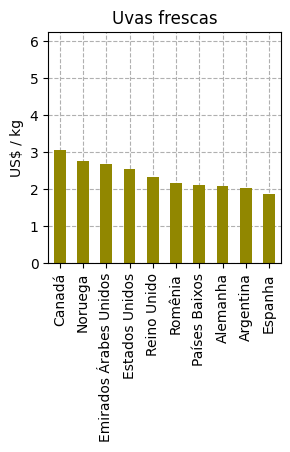

In [74]:
for type in type_color_name.keys():
    valueByKgBarGraph(type)

In [75]:
df = df_exports_by_country_by_type_ri.loc[df_exports_by_country_by_type_ri['tipo'] == 'Vinhos de mesa']

In [76]:
top10 = my.get_top(df,'kg','pais_destino',5)

In [77]:
df.loc[df['pais_destino'].isin(top10)].sort_values('valor_por_kg',ascending=False)

,pais_destino,tipo,categoria,kg,valor,valor_por_kg
178,Estados Unidos,Vinhos de mesa,0.0,3.659709,9.957775,2.720920
107,China,Vinhos de mesa,0.0,2.608917,5.086290,1.949579
237,Haiti,Vinhos de mesa,0.0,2.801918,3.912007,1.396189
373,Paraguai,Vinhos de mesa,0.0,34.508515,47.984063,1.390499
417,Rússia,Vinhos de mesa,0.0,32.822197,23.152054,0.705378


## Há relação entre os dados e o CONTINENTE a qual estamos exportando?

In [78]:
df_exports_by_continent = df_exports_million.groupby('continente').sum(True).reset_index()
df_exports_by_continent

,continente,categoria,kg,valor,valor_por_kg
0,América Central,0.0,4.183567,7.537500,763.338267
1,América do Norte,0.0,150.075818,387.926694,810.824741
2,América do Sul,0.0,68.854668,117.023179,3199.061661
3,Europa,0.0,672.292798,1427.893619,3809.609666
4,Oceania,0.0,0.401866,1.371151,526.745118
5,África,0.0,2.942664,6.032634,930.710888
6,Ásia,0.0,53.750799,139.060858,2489.292992


In [79]:
df_exports_by_continent_by_type = df_exports_million.groupby(['continente', 'tipo']).sum(True)
df_exports_by_continent_by_type

categoria          kg        valor  \
continente       tipo                                                    
América Central  Suco de uva              0.0    0.679539     2.224232   
                 Uvas frescas             0.0    0.124441     0.400269   
                 Vinhos de mesa           0.0    3.331534     4.732314   
                 Vinhos espumantes        0.0    0.048053     0.180685   
América do Norte Suco de uva              0.0    5.494190    12.702925   
                 Uvas frescas             0.0  137.011814   353.597764   
                 Vinhos de mesa           0.0    3.938950    11.230067   
                 Vinhos espumantes        0.0    3.630864    10.395938   
América do Sul   Suco de uva              0.0    3.635679     7.448509   
                 Uvas frescas             0.0   27.158575    53.125710   
                 Vinhos de mesa           0.0   36.907742    52.310129   
                 Vinhos espumantes        0.0    1.152672     4.138831   
Europa           Suco de uva              0.0    1.117823     1.588685   
                 Uvas frescas             0.0  630.748235  1378.074768   
                 Vinhos de mesa           0.0   39.382831    43.460207   
                 Vinhos espumantes        0.0    1.043909     4.769959   
Oceania          Suco de uva              0.0    0.178887     0.372311   
                 Uvas frescas             0.0    0.082735     0.294239   
                 Vinhos de mesa           0.0    0.125611     0.640071   
                 Vinhos espumantes        0.0    0.014633     0.064530   
África           Suco de uva              0.0    1.694774     2.225866   
                 Uvas frescas             0.0    0.205008     0.554830   
                 Vinhos de mesa           0.0    0.755238     1.676536   
                 Vinhos espumantes        0.0    0.287644     1.575402   
Ásia             Suco de uva              0.0   41.275258   106.386661   
                 Uvas frescas             0.0    8.011503    22.138959   
                 Vinhos de mesa           0.0    4.005484     8.835236   
                 Vinhos espumantes        0.0    0.458554     1.700002   

                                    valor_por_kg  
continente       tipo                             
América Central  Suco de uva          143.452612  
                 Uvas frescas         130.400992  
                 Vinhos de mesa       280.720894  
                 Vinhos espumantes    208.763769  
América do Norte Suco de uva          112.404401  
                 Uvas frescas         176.651481  
                 Vinhos de mesa       257.008200  
                 Vinhos espumantes    264.760659  
América do Sul   Suco de uva          316.847944  
                 Uvas frescas        2038.343619  
                 Vinhos de mesa       317.812003  
                 Vinhos espumantes    526.058096  
Europa           Suco de uva          235.722325  
                 Uvas frescas         793.754197  
                 Vinhos de mesa      1463.284438  
                 Vinhos espumantes   1316.848706  
Oceania          Suco de uva           55.280842  
                 Uvas frescas          83.992638  
                 Vinhos de mesa       257.806530  
                 Vinhos espumantes    129.665108  
África           Suco de uva          101.686388  
                 Uvas frescas         209.508434  
                 Vinhos de mesa       322.373471  
                 Vinhos espumantes    297.142595  
Ásia             Suco de uva          297.598795  
                 Uvas frescas         609.555090  
                 Vinhos de mesa       640.738940  
                 Vinhos espumantes    941.400167

In [80]:
df_exports_by_continent_by_type_ri = df_exports_by_continent_by_type['kg'].unstack().reset_index()
df_exports_by_continent_by_type_ri

tipo,continente,Suco de uva,Uvas frescas,Vinhos de mesa,Vinhos espumantes
0,América Central,0.679539,0.124441,3.331534,0.048053
1,América do Norte,5.494190,137.011814,3.938950,3.630864
2,América do Sul,3.635679,27.158575,36.907742,1.152672
3,Europa,1.117823,630.748235,39.382831,1.043909
4,Oceania,0.178887,0.082735,0.125611,0.014633
5,África,1.694774,0.205008,0.755238,0.287644
6,Ásia,41.275258,8.011503,4.005484,0.458554


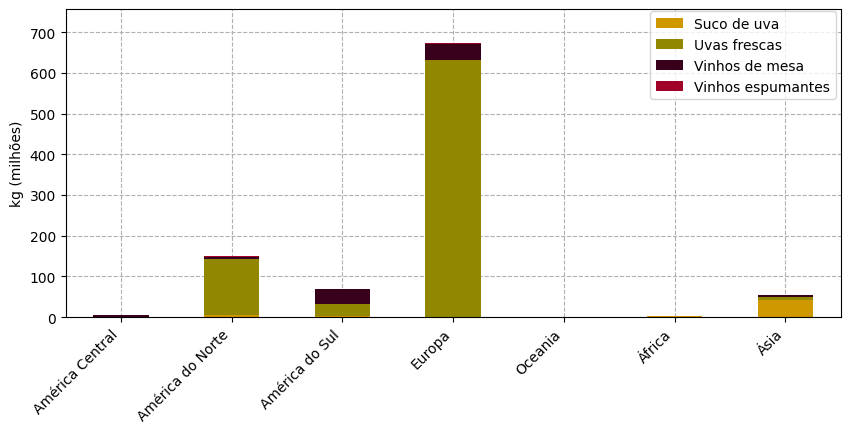

In [81]:
df = df_exports_by_continent_by_type_ri
ax = df.plot(kind='bar',
                                             x='continente',
                                             stacked=True,
                                             color = [type_color.get(x, '#333333') for x in df.columns[1:]],
                                             figsize=size_squash_mild)
my.set_labels('', 'kg (milhões)')
my.add_grid(ax)
ax.legend(loc='center left', bbox_to_anchor=(0.745,  0.85))
my.rotate_label()
my.set_y_lim(df, 'Uvas frescas')
ax.set_xlabel('')
ax.set_ylabel('kg (milhões)')

my.ticks_per_interval(ax, 100,0,'y')

my.export_fig(f'peso_bar_continente')

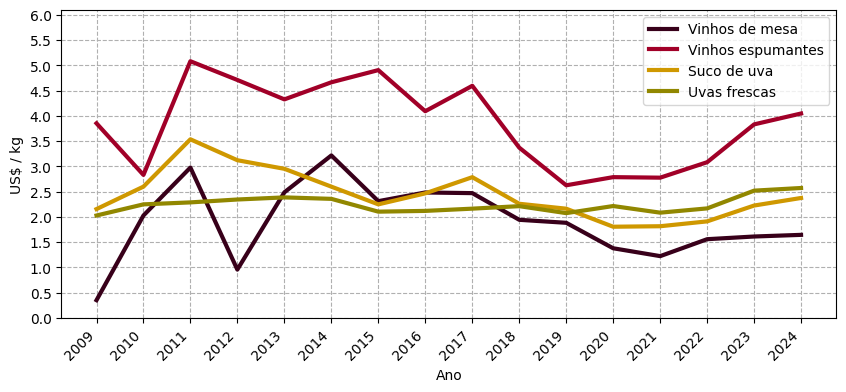

In [85]:
my.set_figsize(size_squash_mild)
for kind in export_type:
    filter = df_exports_by_year_by_type['tipo'] == kind
    df = df_exports_by_year_by_type.loc[filter]
    plt.plot('ano', 'valor_por_kg', data=df, color=type_color[kind], label=kind, linewidth=line_width)

ax = plt.gca()
my.add_grid(ax)
plt.legend()

my.set_labels('Ano', 'US$ / kg')
my.ticks_on_years(ax)
my.ticks_per_interval(ax,0.5,0,'y')
my.rotate_label()
my.set_y_lim(df_exports_by_year_by_type, 'valor_por_kg')

my.export_fig(f'valorPorKg_linha_categorias')